In [166]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import numpy as np
import datetime
import matplotlib
from os import listdir
from os.path import isfile, join
percorso = 'D:/Università/Tirocinio/Analisi Dati/Studio Dati/'
onlyfiles = [f for f in listdir(f'{percorso}/risultati_terremoto/') if isfile(join(f'{percorso}/risultati_terremoto/', f))]
inizio = pd.to_datetime('20160801', format='%Y%m%d')
# Mancano 4 ore nel giorno 2016-08-16
fine = pd.to_datetime('20160915', format='%Y%m%d')
comune = 'Macerata'

coms = pd.Series(pd.read_csv('D:/Università/Tirocinio/Analisi Dati/Grezzo Niki/sezione2comuneDEF.csv').comune.unique(), name= 'Comune')
crateri = pd.read_csv('D:/Università/Tirocinio/Analisi Dati/Studio Dati/crateriCentroIT.csv', sep=';').merge(coms, how='outer').drop(columns='Provincia')
crateri['Cratere Centro Italia 2016'].fillna('0', inplace=True)


In [170]:
dfc = pd.read_csv(f'{percorso}/risultati_terremoto/CentroItalia_{inizio.strftime("%Y%m%d")}_{inizio.strftime("%Y%m")}30_24.csv', header=None)
dfc.rename(columns={0: 'Comune', 1: 'val', 2: 'data'}, inplace=True)
dfc = dfc.loc[dfc['Comune'] == comune]
dfc = dfc.merge(crateri)
dfc.rename(columns={'Cratere Centro Italia 2016': 'terremotata', 'Comune': 'comune'}, inplace=True)
dfc['data'] = pd.to_datetime(dfc['data'], format='%Y%m%d_%H%M')
print(dfc.comune.shape[0])

for i in onlyfiles:
    giorno = pd.to_datetime(i.split('_')[1], format='%Y%m%d')
    if (giorno > inizio) and (giorno <= fine):

        esempio = pd.read_csv(f'{percorso}/risultati_terremoto/{i}', header=None)
        esempio.rename(columns={0: 'Comune', 1: 'val', 2: 'data'}, inplace=True)
        esempio = esempio.loc[esempio['Comune'] == comune]
        esempio = esempio.merge(crateri)
        esempio.rename(columns={'Cratere Centro Italia 2016': 'terremotata', 'Comune' : 'comune'}, inplace= True)
        esempio['data']= pd.to_datetime(esempio['data'], format='%Y%m%d_%H%M')
        dfc = pd.concat([dfc, esempio])

dfc.data = dfc.data.dt.date
dfc = dfc.groupby(['comune', 'data','terremotata']).aggregate('val').mean().reset_index()
dfc


24


,comune,data,terremotata,val
0,Macerata,2016-08-01,1.0,157011.958333
1,Macerata,2016-08-02,1.0,157654.114583
2,Macerata,2016-08-03,1.0,156520.572917
3,Macerata,2016-08-04,1.0,157503.343750
4,Macerata,2016-08-05,1.0,160508.583333
5,Macerata,2016-08-06,1.0,152546.427083
6,Macerata,2016-08-07,1.0,137908.760417
7,Macerata,2016-08-08,1.0,147401.218750
8,Macerata,2016-08-09,1.0,145366.812500
9,Macerata,2016-08-10,1.0,147182.520833


In [171]:
sedici = dfc.loc[dfc.data == pd.to_datetime('20160801', format='%Y%m%d').date()]['val']
for i in range (len(dfc)):
    dfc.iloc[i,3] = (dfc.iloc[i, 3] - sedici)*100/ sedici

(array([17014., 17021., 17028., 17035., 17045., 17052., 17059.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

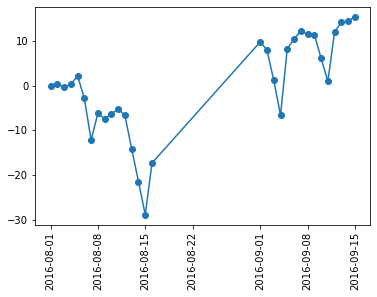

In [179]:
plt.plot(dfc.data,dfc.val)
plt.scatter(dfc.data, dfc.val)
plt.xticks(rotation= 90)
-